# Setup

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm.auto import tqdm 

# config setup for fast experiment
from src.config import Config

# some utilities
from src.utils import show_samples, process_im

# boosting lib 
import catboost 


In [2]:
# Train.csv has the Field_IDs needed to find the npy files
train = pd.read_csv(os.path.join(Config.data_dir, 'Train.csv'))
print(train.shape)
train.head()

(2977, 4)


,Field_ID,Year,Quality,Yield
0,MH2O0YH,2019,3,3.686
1,O9TURWL,2019,2,5.657
2,35AFSDD,2019,3,3.082
3,PM05EG9,2019,2,2.707
4,V7PZBCG,2019,2,2.679


# Fitting a model

Now that we have a way to get features from the inputs, we can fit a model and see how it does:

Score: 1.5782647444036877


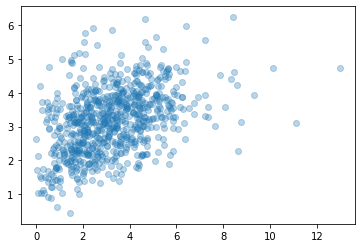

In [9]:
# Split the data
X, y  = train_sampled[train_sampled.columns[:-2]], train_sampled['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model
model = lightgbm.LGBMRegressor()
model.fit(X_train, y_train)

# Score with RMSE
print('Score:', mean_squared_error(y_test, model.predict(X_test), squared=False))

# Plot pred vs actual for the test set:
plt.scatter(y_test, model.predict(X_test), alpha=0.3)

# Saving Preds

Once we're happy with how we generate our inputs, we must process the test fields in the same way and save predictions. Here it is, condensed. Note the Field_IDs from the sample submission are used, and the same `process_im` function prepares the inputs, this time looking for .npy files in the 'image_arrays_test' folder. 

In [10]:
# Load the sample submission file
ss = pd.read_csv('../data/SampleSubmission.csv')

# Prep the data, using the same method we did for train
test_sampled = pd.DataFrame([process_im(fid, folder='../data/image_arrays_test') for fid in tqdm(ss['Field_ID'].values)])

# Get model predictions
preds = model.predict(test_sampled)

In [12]:

# Store them in the submission dataframe and save
ss['Yield'] = preds
filename = f'{Config.base_model}_lr-{lr}.csv'
ss.to_csv(filename, index=False)
ss.head()

,Field_ID,Yield
0,E9UZCEA,4.139209
1,1WGGS1Q,3.441111
2,EG2KXE2,3.975924
3,HC3GQXF,3.807039
4,7AK6GFK,3.052830
